# Animaciones

Correr en Python 3.9 porque es donde tengo instalado el ffmpeg

In [6]:
!pip install ffmpeg-python

In [2]:
!pip install ffmpeg

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6089 sha256=037a7bfeb0e67e2914c93de65bc60ca6b36ce266645ac6eb46a6bafd4270d31f
  Stored in directory: c:\users\windows\appdata\local\pip\cache\wheels\8e\7a\69\cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
# Leer el archivo
gapminder = pd.read_csv("https://raw.githubusercontent.com/OHI-Science/data-science-training/master/data/gapminder.csv")
# Modificar el dataset
gapminder = gapminder.assign(
  log_gdp=lambda df: np.log(df["gdpPercap"]),
  log_pop=lambda df: np.log(df["pop"]),
  decade=lambda df: np.floor(df["year"] / 10) * 10
)
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap,log_gdp,log_pop,decade
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.658583,15.946754,1950.0
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,6.710344,16.039154,1950.0
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,6.748878,16.144454,1960.0
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,6.728864,16.261154,1960.0
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,6.606625,16.386554,1970.0


In [2]:
from matplotlib import animation
import matplotlib.pyplot as plt
#Writer = animation.FFMpegWriter(fps=30, codec='libx264')  #or 
#Writer = animation.FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)
# Paises a graficar
paises_plot = ['Spain', 'Italy', 'United States']
linea_plot = gapminder.loc[gapminder['country'].isin(paises_plot), :]

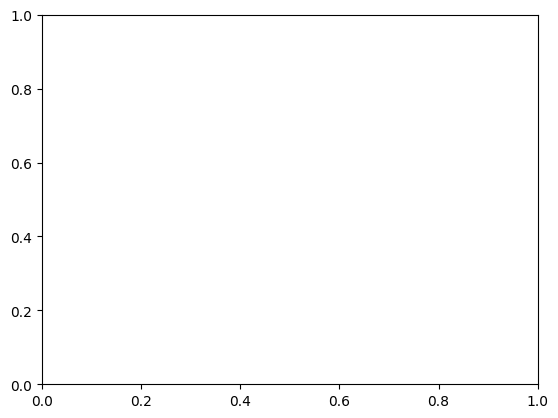

In [3]:
# Definir los colores
colors = ['red', 'green', 'blue']
# Definir la figura
fig, ax = plt.subplots()

def update_linechart(i):
  for j in range(len(colors)):
    country = paises_plot[j]
    color = colors[j]
    data = linea_plot.loc[linea_plot['country'] == country,:]
    ax.plot(data.year[:i], data.gdpPercap[:i], color)

In [4]:
num_frames = len(linea_plot['year'].unique())        
animacion = animation.FuncAnimation(fig, update_linechart, frames = num_frames)
#Interval=  Delay between frames in milliseconds.
# guardar la animacion en la ruta dada
plt.show(animacion)

In [5]:
animacion.save('lines.gif')

In [6]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

In [7]:
paises_plot = ['Spain', 'Italy', 'United States','Argentina','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(paises_plot), :]

font = {'weight': 'normal','size'  :  40,'color': 'lightgray'}

colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

data_temp = barchart_data.loc[barchart_data['year'] == 2007, :]
data_temp

,country,year,pop,continent,lifeExp,gdpPercap,log_gdp,log_pop,decade
59,Argentina,2007,4.030193e+07,Americas,75.320,12779.379640,9.455588,17.511910,2000.0
299,China,2007,1.318683e+09,Asia,72.961,4959.114854,8.508983,20.999899,2000.0
779,Italy,2007,5.814773e+07,Europe,80.546,28569.719700,10.260103,17.878497,2000.0
1427,Spain,2007,4.044819e+07,Europe,80.941,28821.063700,10.268862,17.515532,2000.0
1619,United States,2007,3.011399e+08,Americas,78.242,42951.653090,10.667830,19.523086,2000.0


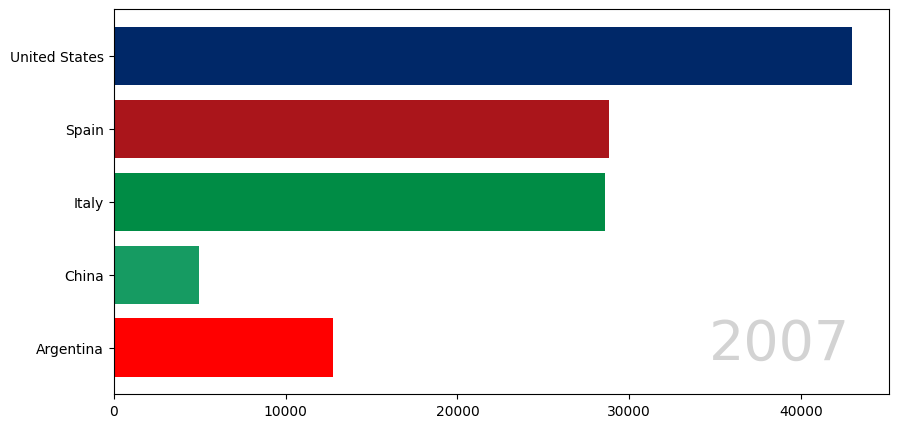

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.clear()
ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)

ax.text(0.95, 0.2, data_temp['year'].iloc[0],
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
       fontdict=font)
plt.show()

In [9]:
paises_plot = ['Spain', 'Italy', 'United States','Argentina','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(paises_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = barchart_data['year'].unique()
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

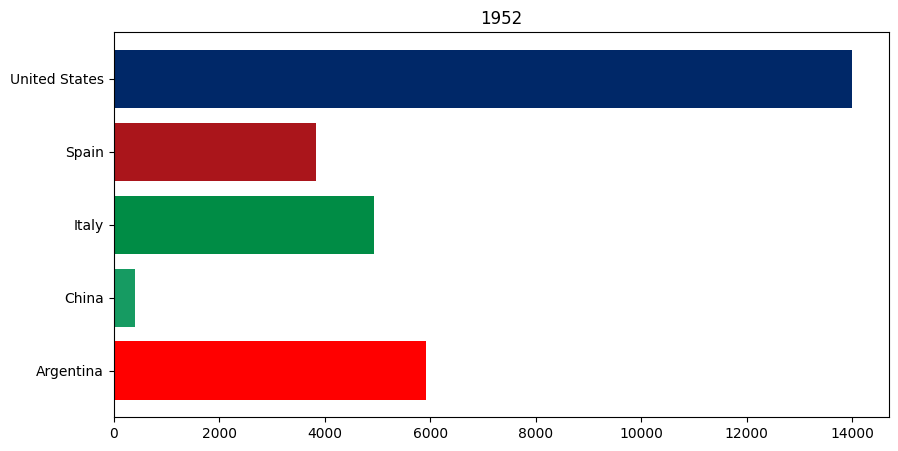

In [10]:
colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = barchart_data.loc[barchart_data['year'] == year, :]
  ax.clear()
  ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000)
#animacion.save('barchart.gif')  

In [22]:
animacion.save('barchart.gif')  

In [11]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

In [13]:
import numpy as np
import matplotlib

scatter_data = gapminder.copy()
# Colores de acuerdo a la condicion
conditions = [
  scatter_data.continent == 'Asia',
  scatter_data.continent == 'Europe',
  scatter_data.continent == 'Africa',
  scatter_data.continent == 'Americas',
  scatter_data.continent == 'Oceania',
]

values = list(range(5))

scatter_data['color'] = np.select(conditions, values)
scatter_data

,country,year,pop,continent,lifeExp,gdpPercap,log_gdp,log_pop,decade,color
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.658583,15.946754,1950.0,0
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,6.710344,16.039154,1950.0,0
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,6.748878,16.144454,1960.0,0
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,6.728864,16.261154,1960.0,0
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,6.606625,16.386554,1970.0,0
...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,6.559838,16.036497,1980.0,2
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,6.541637,16.186160,1990.0,2
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,6.675129,16.249558,1990.0,2
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,6.510316,16.294279,2000.0,2


In [17]:
font = {'weight': 'normal','size'  :  40,'color': 'lightgray'}
years = scatter_data['year'].unique()

data_temp = scatter_data.loc[scatter_data['year'] == years[-1], :]
colors =[f'C{i}' for i in np.arange(1, 6)]


['C1', 'C2', 'C3', 'C4', 'C5']

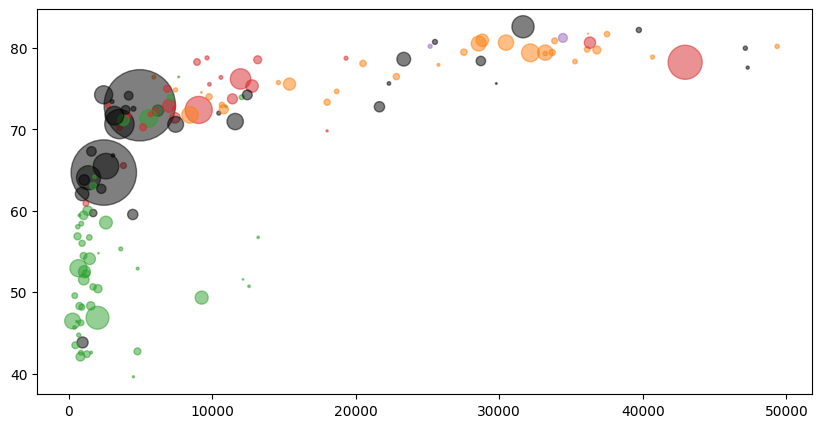

In [14]:
font = {'weight': 'normal','size'  :  40,'color': 'lightgray'}
years = scatter_data['year'].unique()

data_temp = scatter_data.loc[scatter_data['year'] == years[-1], :]
label = ax.text(0.95, 0.25, years[-1],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)

fig, ax = plt.subplots(figsize=(10, 5))
scatter = ax.scatter(data_temp.gdpPercap,
                     data_temp.lifeExp,
                     s=data_temp['pop']/500000, 
                     alpha = 0.5, 
                     c=data_temp.color, 
                     cmap=cmap,
                     norm=norm)
label.set_text(years[-1])
plt.show()

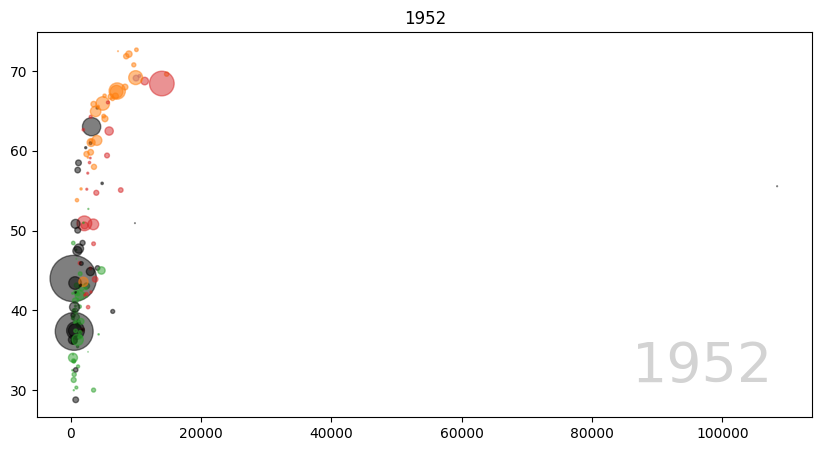

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
years = scatter_data['year'].unique()
colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)

label = ax.text(0.95, 0.25, years[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)


def update_scatter(i):
    year = years[i]
    data_temp = scatter_data.loc[scatter_data['year'] == year, :]
    ax.clear()
    label = ax.text(0.95, 0.20, years[i],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    ax.scatter(
        data_temp['gdpPercap'],
        data_temp['lifeExp'],
        s=data_temp['pop']/500000, 
        alpha = 0.5, 
        c=data_temp.color, 
        cmap=cmap,
        norm=norm
    )
    ax.set_title(str(year))

    label.set_text(year)

anim = animation.FuncAnimation(fig, update_scatter, frames = len(years), interval = 1000)
#anim.save('scatter.gif')  

In [19]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [17]:
anim.save('scatter.gif')  